# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns



df = 'dados_tarefa2.csv'

dados = pd.read_csv(df)

# Convertendo variáveis categóricas usando one-hot encoding
dados = pd.get_dummies(dados)

# Exibindo informações sobre o DataFrame
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  bool   
 9   sexo_F                                  16650 non-null  bool   
 10  sexo_M                                  16650 non-null  bo

In [47]:
# Separar as variáveis explicativas (features) e a variável resposta (target)
X = dados.iloc[:, :-1]  
y = dados.iloc[:, -1]   

# Dividir os dados em conjuntos de treinamento (70%) e validação (30%)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar o tamanho dos conjuntos
print("Tamanho do conjunto de treino:", len(X_treino))
print("Tamanho do conjunto de teste:", len(X_teste))

# Salvar os conjuntos de treino e teste em novos arquivos CSV 
X_treino.to_csv('X_treino.csv', index=False)
X_teste.to_csv('X_teste.csv', index=False)
y_treino.to_csv('y_treino.csv', index=False)
y_teste.to_csv('y_teste.csv', index=False)

Tamanho do conjunto de treino: 11655
Tamanho do conjunto de teste: 4995


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [48]:
# Criando o objeto da árvore de decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)

# Treinar o modelo com os dados de treinamento
modelo_arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=42)

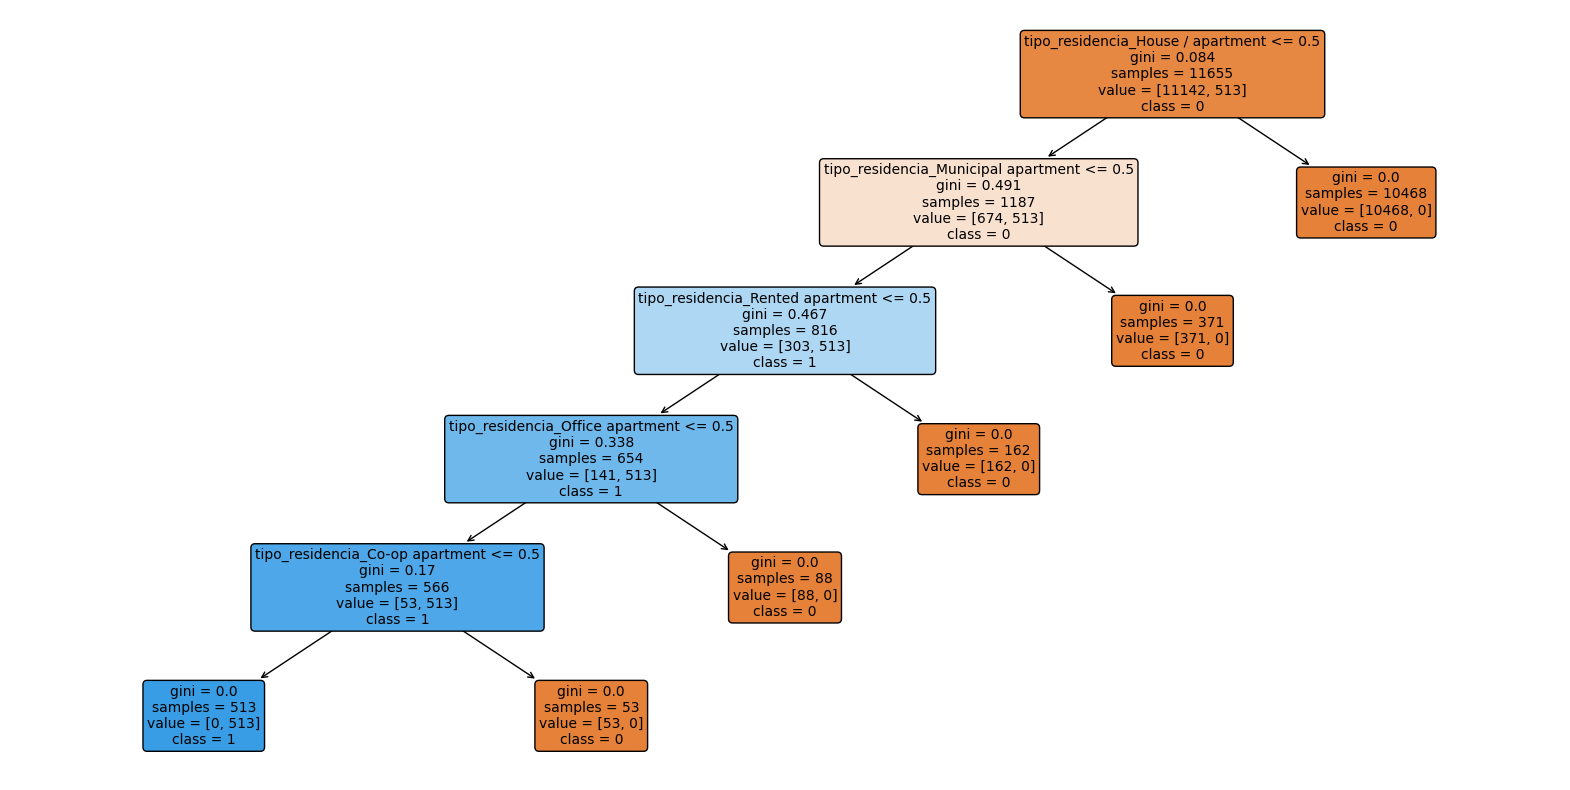

In [49]:
# Exibir a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(modelo_arvore, feature_names=X_treino.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=10)
plt.show()

[False  True False ... False False False]


<Figure size 800x600 with 0 Axes>

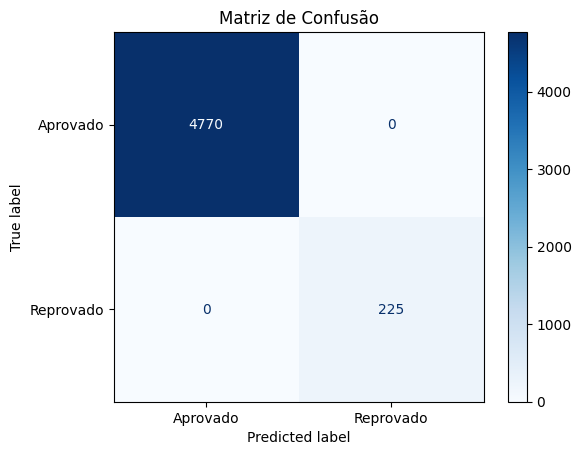

In [50]:
# Selecionar apenas as colunas utilizadas no treinamento
X_teste = X_teste[X_treino.columns]

# Fazer previsões na base de teste
previsoes_teste = modelo_arvore.predict(X_teste)

# Exibir as previsões
print(previsoes_teste)

# Criar a matriz de confusão
cm = confusion_matrix(y_validacao, previsoes_validacao, labels=modelo_arvore.classes_)

# Definir rótulos para as classes
rotulos_classes = ['Aprovado', 'Reprovado']

# Exibir a matriz de confusão com rótulos
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rotulos_classes)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão')
plt.show()

In [51]:
# Fazer previsões no conjunto de treinamento
previsoes_treino = modelo_arvore.predict(X_treino)

# Calcular a acurácia
acuracia_treino = accuracy_score(y_treino, previsoes_treino)

print(f'Acurácia na base de treinamento: {acuracia_treino:.2%}')

Acurácia na base de treinamento: 100.00%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [36]:
# Selecionar apenas as colunas utilizadas no treinamento
X_teste = X_teste[X_treino.columns]

# Fazer previsões na base de teste
previsoes_teste = modelo_arvore.predict(X_teste)

# Exibir as previsões
previsoes_teste

array([False, False, False, ..., False, False, False])

<Figure size 800x600 with 0 Axes>

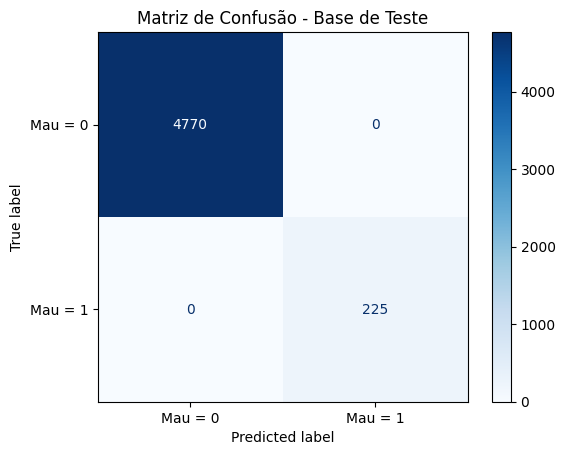

In [38]:
# Definir rótulos para as classes
rotulos_classes = ['Mau = 0', 'Mau = 1']

# Exibir a matriz de confusão com rótulos
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rotulos_classes)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - Base de Teste')
plt.show()

In [52]:
# Calcular a acurácia na base de treinamento
acuracia_treino = accuracy_score(y_treino, previsoes_treino)
print(f'Acurácia na base de treinamento: {acuracia_treino:.2%}')

# Calcular a acurácia na base de teste
acuracia_teste = accuracy_score(y_teste, previsoes_teste)
print(f'Acurácia na base de teste: {acuracia_teste:.2%}')

Acurácia na base de treinamento: 100.00%
Acurácia na base de teste: 100.00%


<Figure size 800x600 with 0 Axes>

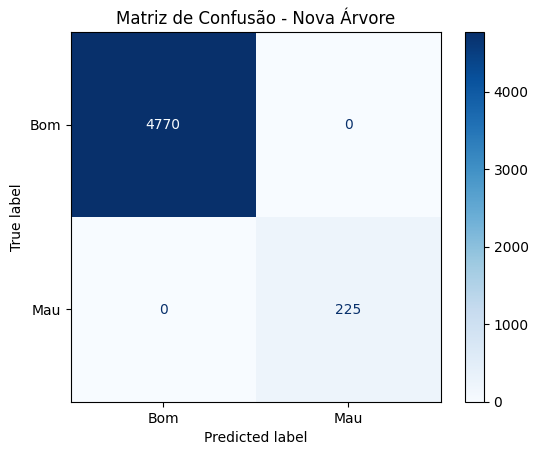

Proporção de proponentes classificados como "maus": 4.50%


In [53]:
# Criar a nova árvore de decisão com os parâmetros especificados
modelo_arvore_nova = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

# Treinar o modelo com os dados de treinamento
modelo_arvore_nova.fit(X_treino, y_treino)

# Fazer previsões na base de teste
previsoes_teste_nova = modelo_arvore_nova.predict(X_teste)

# Criar a matriz de confusão
cm_nova = confusion_matrix(y_teste, previsoes_teste_nova, labels=modelo_arvore_nova.classes_)

# Exibir a matriz de confusão com rótulos
disp_nova = ConfusionMatrixDisplay(confusion_matrix=cm_nova, display_labels=['Bom', 'Mau'])
plt.figure(figsize=(8, 6))
disp_nova.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - Nova Árvore')
plt.show()

# Calcular a proporção de proponentes classificados como 'maus'
proporcao_maus_nova = sum(previsoes_teste_nova) / len(previsoes_teste_nova)
print(f'Proporção de proponentes classificados como "maus": {proporcao_maus_nova:.2%}')

In [56]:
# Acurácia considerando todos os contratos como 'bons'
acuracia_todos_bons = y_teste.value_counts(normalize=True).get(False, 0)

print(f'Acurácia considerando todos os contratos como "bons": {acuracia_todos_bons:.2%}')

Acurácia considerando todos os contratos como "bons": 95.50%
